# Baysean Sructural Time Series Tutorial 1: Nowcasting

Hello fellow traveler! I can see by the look on your face that you want to know about how Baysean statistics can be applied to time series analysis. 

Before we begin, I assume that you know a basic understanding of **time series**: a stochastic process of state variables whose current state depends on its past, with some added random noise. Ahh time series, they are a mysterious and elusive technique used to predict the future, but fret naut *Laughs heartly*. Together we may unravel these secrets together. Let's embark on this quest by introducing the Baysean Sructural Time Series Modeling with some data we are interested in forcasting in the near future now refered to as **Nowcasting**.

Consider sea surface temperature SST of the first 30 meters around Gilbralter, shown below

Loading required package: MASS

Attaching package: ‘Boom’

The following object is masked from ‘package:stats’:

    rWishart


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: BoomSpikeSlab
Loading required package: xts
Parsed with column specification:
cols(
  X1 = col_integer(),
  `Unnamed: 0` = col_integer(),
  `Unnamed: 0.1` = col_integer(),
  `Unnamed: 0.1.1` = col_integer(),
  `Unnamed: 0.1.1.1` = col_integer(),
  `Unnamed: 0.1.1.1.1` = col_integer(),
  `Unnamed: 0.1.1.1.1.1` = col_double(),
  tempMean = col_double(),
  psalMean = col_double(),
  tempStd = col_double(),
  psalStd = col_double(),
  startDate = col_date(format = ""),
  endDate = col_date(format = ""),
  nProf = col_double()
)


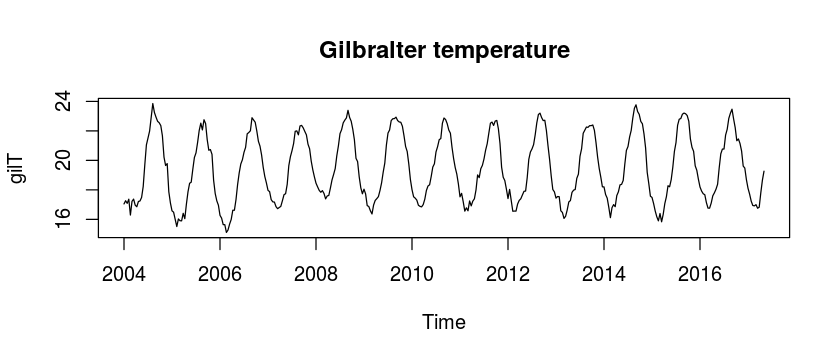

In [1]:
library(Boom)
library(zoo)
library(bsts)     # load the bsts package
library(readr)
options( warn = -1 )
options(repr.plot.width=7, repr.plot.height=3)
gilbralter <- read_csv("gilbralter.csv")
gilT <- ts(gilbralter$tempMean, start=c(2004,1,13), end=c(2017, 11, 25), frequency=30)
plot(gilT, main="Gilbralter temperature")

SST can be modeled as $y_t$. We can see it has a time series behavior, lets model this as $y_{t-\tau}$. We are directly reading the data source $x_t$. Note that $x_t$ may contain false measurements and outliers!. We can model $y_t$ with three components: trend $\mu_t$, seasonal pattern $\tau_t$ and a regression component $\beta x_t$. This is modeled by four equations.

$$
y_t = \mu_t + \tau_t + \beta^Tx_t + \epsilon_t
$$

$$
\mu_{n+1} = \mu_t + \delta_t + \eta_{0t}
$$

$$
\delta_{t+1} = \delta_t + \eta_{1t}
$$

$$
\tau_{t+1} = -\Sigma_{s=1}^{s-1} \tau_t + \eta_{2t}
$$

We model $\delta_t$ as the slope of a linear trend, and can see that the slope evolves as a random walk (third equation), making the second equation an integrated random walk with an extra drift term. 

For now $\eta_{nt}, \epsilon_{t}$ are Normal independent distribtions.

Suppose that we are interested in 'nowcasting'. The local linear trend is good for this is if you think the time series is trending in a particular direction, and you want to include this recent trend in future observations.

Let's ignore the regression component $\beta^T x_t$ for now and fit a bsts model with just the trend and seasonal components.

We use the bsts library. But first a little more theory on Structural time series models...

### Structural Time Series

Consider an **observation equation** relating an observation $y_t$ to a system state $\alpha_t$.

$$
y_t = Z_t^T \alpha_t + \epsilon_t
$$

Also consider that the state $\alpha_t$ evolves through time as described by the **transition equation**

$$
\alpha_{t-1} = T_t \alpha + R_t \eta_t
$$

Parameters $Z_t^T$, $T_t$, and $R_t$ are **structural parameters**. Those greek terms at the end represent normally distributed random errors at each time step, $t$. 

$$
\epsilon_t ~ N(0, \sigma^2)
$$

$$
\eta_t ~ N(0, \zeta^2)
$$

We assume that $\epsilon_t$ and $\eta_t$ are independent of everything.

### Fitting a Structural Time Series

To model $y_t = Z_t^T \alpha_t + \epsilon_t$ with $\alpha_{t-1} = T_t \alpha + R_t \eta_t$, we first need to specify the contents of the **latent state vector** $\alpha_t$. R's has a **Baysean Sturctural Time Series** library called bsts that handles this with the **state specification object** *ss*. 

In our case, we are interested in only modeling trend and seasonal components. This is handled by the code below...

In [4]:
nseasons = 30 #A 12 day aggregate has 30 samples per period.
ss <- AddLocalLinearTrend(list(), gilT)
ss <- AddSeasonal(ss, gilT, nseasons=nseasons)

Here some strange magic happens inside of the _bsts_ function.

In [5]:
model1 <- bsts(gilT,
               state.specification=ss,
               niter = 1000)

=-=-=-=-= Iteration 0 Sun Feb 25 11:11:43 2018 =-=-=-=-=
=-=-=-=-= Iteration 100 Sun Feb 25 11:11:47 2018 =-=-=-=-=
=-=-=-=-= Iteration 200 Sun Feb 25 11:11:52 2018 =-=-=-=-=
=-=-=-=-= Iteration 300 Sun Feb 25 11:11:56 2018 =-=-=-=-=
=-=-=-=-= Iteration 400 Sun Feb 25 11:12:00 2018 =-=-=-=-=
=-=-=-=-= Iteration 500 Sun Feb 25 11:12:04 2018 =-=-=-=-=
=-=-=-=-= Iteration 600 Sun Feb 25 11:12:09 2018 =-=-=-=-=
=-=-=-=-= Iteration 700 Sun Feb 25 11:12:13 2018 =-=-=-=-=
=-=-=-=-= Iteration 800 Sun Feb 25 11:12:18 2018 =-=-=-=-=
=-=-=-=-= Iteration 900 Sun Feb 25 11:12:22 2018 =-=-=-=-=


We don't know what is happening underneath this function; but behold, we have a seasonal and trend models!

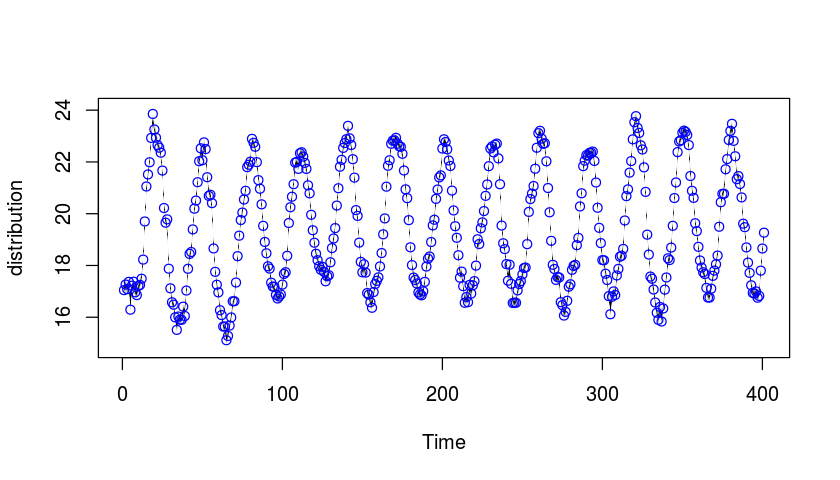

In [11]:
options(repr.plot.width=7, repr.plot.height=4)
plot(model1)

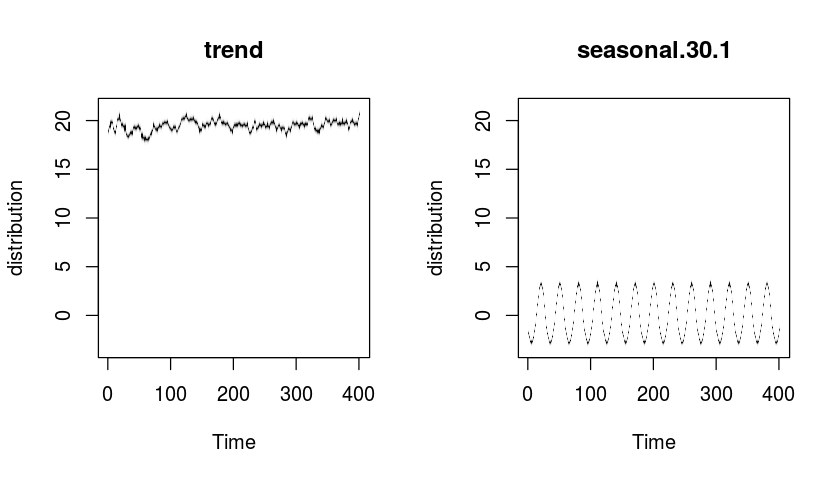

In [12]:
plot(model1, "components")

From here we can perform nowcasting 12 time steps in the future (144 days) with the following code.

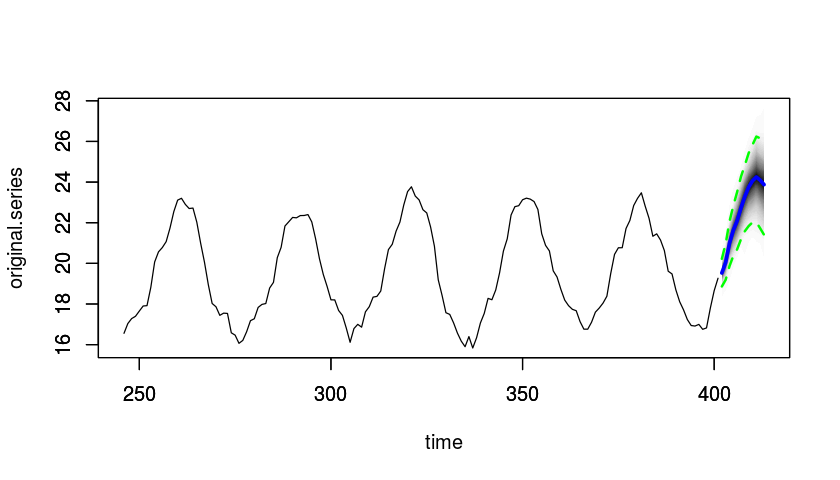

In [9]:
pred1 <- predict(model1, horizon = 12)
plot(pred1, plot.original = 156)

### Your quest, should you choose to accept...

What a method! But how does it work? Glory and reward await those who are brave enough to navigate the trials and tribulations involved in learning bsts. Come stalwart adventurer! let us explore this dungeon of mysterious treasures. In the following tutorials, we will battle untold horrors and demons together, who guard the secrects of bsts. With this power we will be able to

* Modeling non-gaussian noise

* Apply Baysean priors

* Apply several type of Monte Carlo Markov Chains

* Forcast long term trends

Some theory reading is available here [here](http://people.ischool.berkeley.edu/~hal/Papers/2013/pred-present-with-bsts.pdf)

Another tutorial by Steven L. Scott, the Author of BSTS is [here](http://www.unofficialgoogledatascience.com/2017/07/fitting-bayesian-structural-time-series.html)

Code used to create this notebook is located [here](https://github.com/asbates/bayes-time-series)

[bsts documentation](https://cran.r-project.org/web/packages/bsts/bsts.pdf)